In [1]:
import matplotlib.pyplot as plt
import numpy as np
from centrex_tlf.centrex_tlf_rust import (
    generate_uncoupled_hamiltonian_X_py,
    generate_coupled_hamiltonian_B_py,
    generate_transform_matrix_py,
    generate_coupling_matrix_py,
    wigner_3j_py,
    wigner_6j_py,
)

from centrex_tlf import constants, hamiltonian, states, couplings


In [2]:
QN = states.generate_uncoupled_states_ground(Js=[0, 1, 2, 3, 4, 5, 6])

In [3]:
%%time
HX_python = hamiltonian.generate_hamiltonian._generate_uncoupled_hamiltonian_X_python(
    QN
)

CPU times: total: 969 ms
Wall time: 1.38 s


In [4]:
%%time
HX_rust = generate_uncoupled_hamiltonian_X_py(QN, constants.XConstants())

CPU times: total: 0 ns
Wall time: 10 ms


0.0
0.0
0.0
0.0
0.0
0.0
0.0


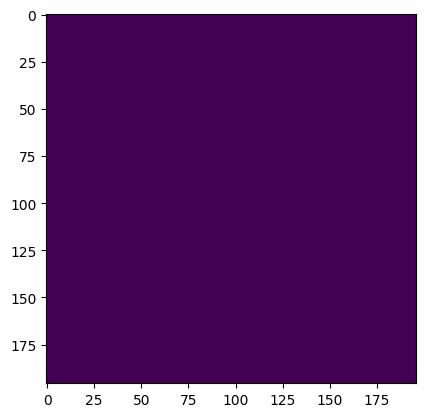

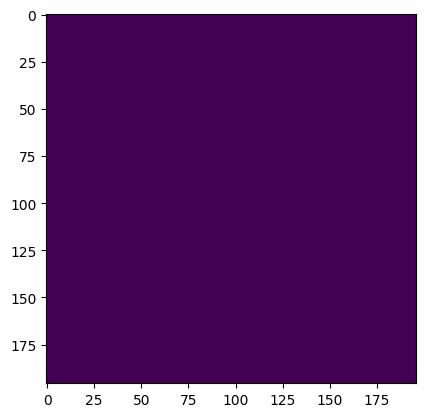

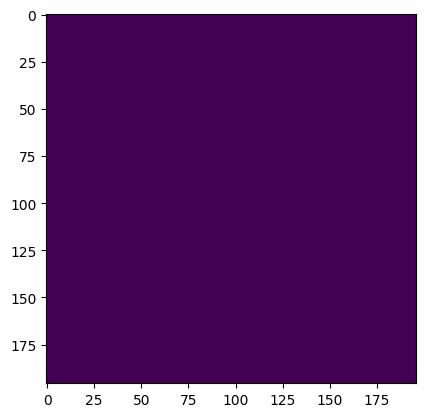

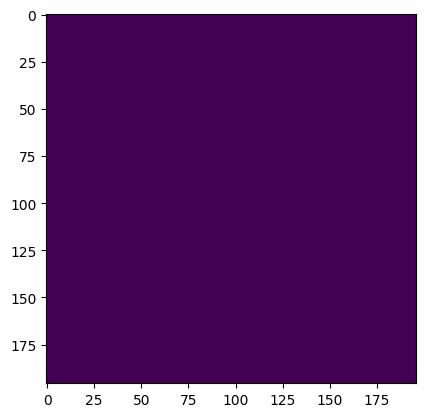

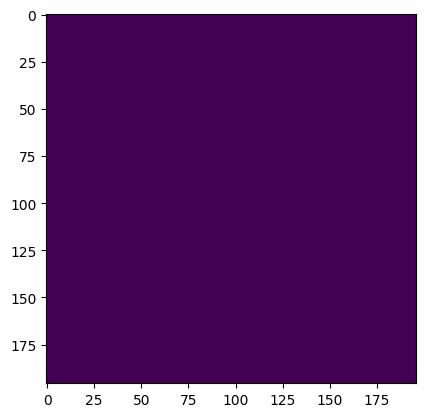

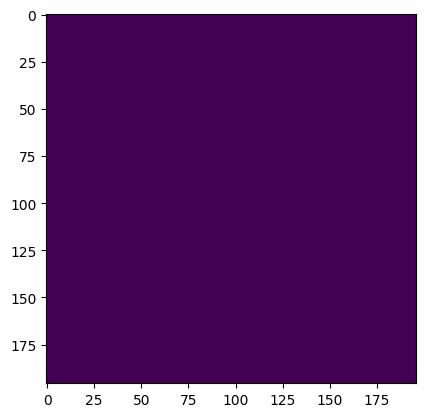

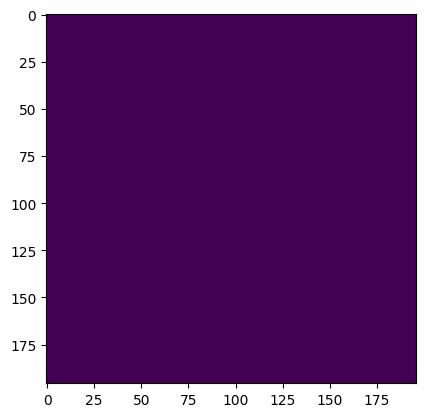

In [5]:
for attr in HX_rust.__dataclass_fields__.keys():
    fig, ax = plt.subplots()

    ax.imshow(np.abs((getattr(HX_rust, attr)) - getattr(HX_python, attr)))

    print((np.abs((getattr(HX_rust, attr))) - np.abs(getattr(HX_python, attr))).sum())

C:\Users\Olivier\AppData\Local\Temp\ipykernel_24564\1181592019.py:2: RuntimeWarning: invalid value encountered in divide
  ax.imshow(np.abs(HX_rust.Hff - HX_python.Hff) / np.abs(HX_python.Hff))


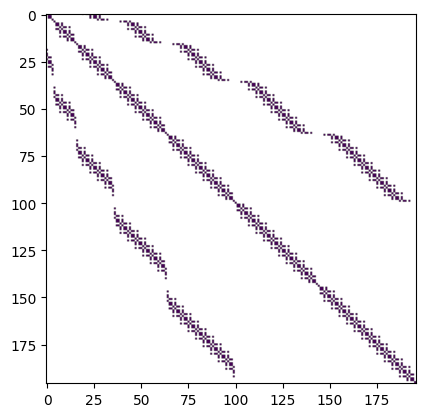

In [6]:
fig, ax = plt.subplots()
ax.imshow(np.abs(HX_rust.Hff - HX_python.Hff) / np.abs(HX_python.Hff))

In [7]:
%%timeit
HX_python = hamiltonian.generate_hamiltonian._generate_uncoupled_hamiltonian_X_python(
    QN
)

839 ms ± 90.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
cst = constants.XConstants()

In [9]:
%%timeit
HX_rust = generate_uncoupled_hamiltonian_X_py(QN, cst)

12.4 ms ± 371 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
qn_select = states.QuantumSelector(
    J=[1, 2, 3, 4, 5, 6, 7], electronic=states.ElectronicState.B
)
QN_B = states.generate_coupled_states_B(qn_select)

In [11]:
cst_B = constants.BConstants()
HB_rust = generate_coupled_hamiltonian_B_py(QN_B, cst_B)

In [12]:
HB_python = hamiltonian.generate_hamiltonian._generate_coupled_hamiltonian_B_python(
    QN_B, cst_B
)

Hrot = 0.00e+00
H_mhf_Tl = 1.47e-04
H_mhf_F = -1.71e-05
H_LD = 0.00e+00
H_cp1_Tl = 0.00e+00
H_c_Tl = -3.32e-07
HSx = -3.23e-08
HSy = -3.23e-08
HSz = -1.69e-08
HZx = -3.55e-08
HZy = -3.55e-08
HZz = -2.25e-08


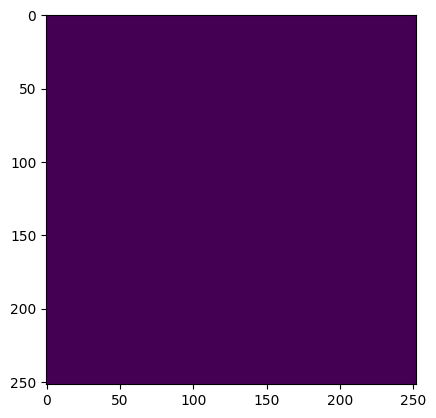

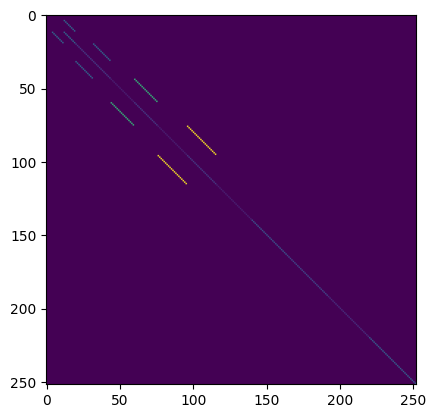

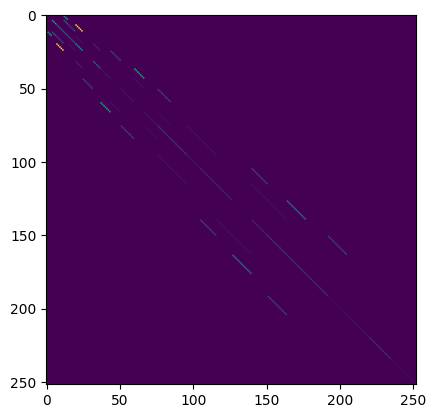

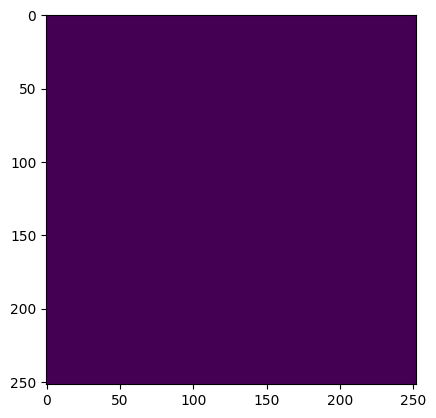

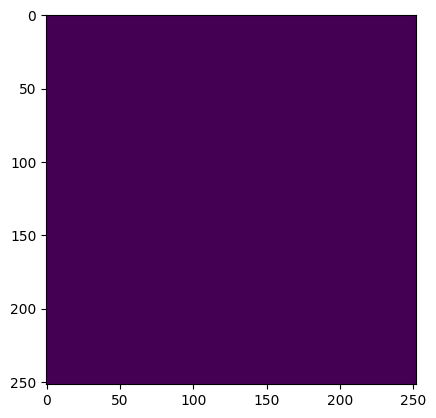

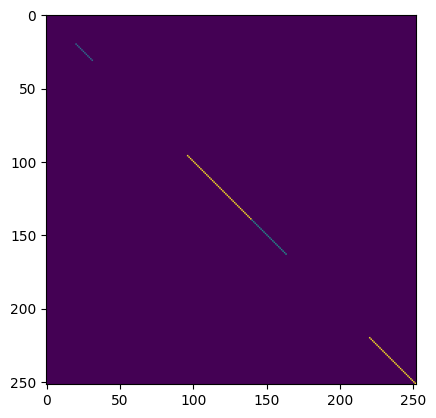

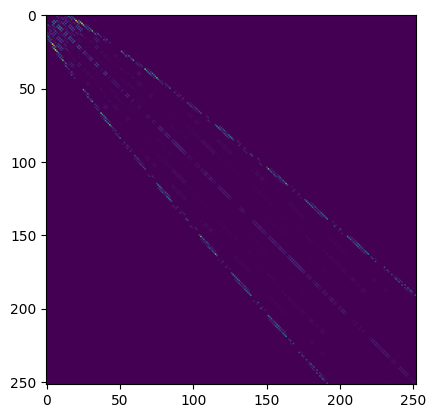

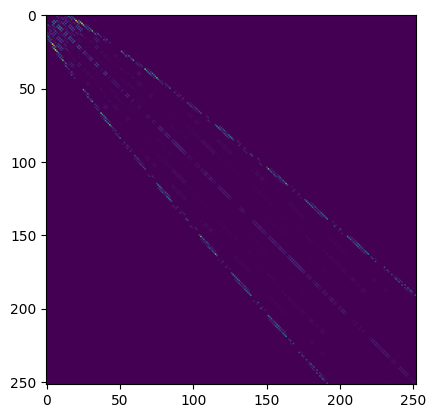

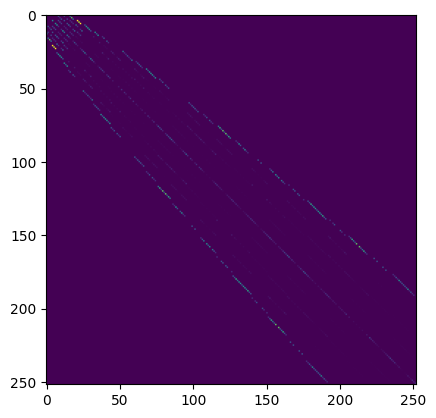

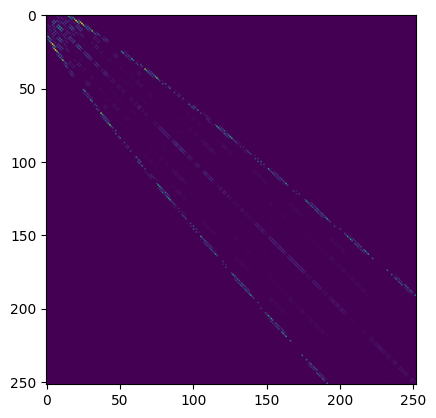

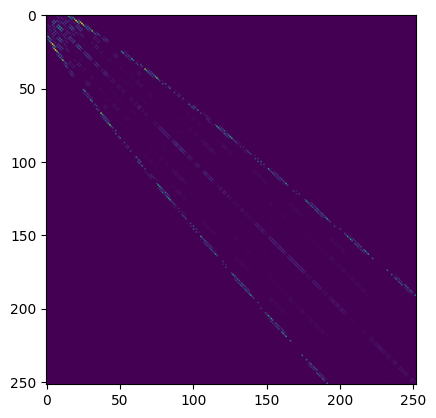

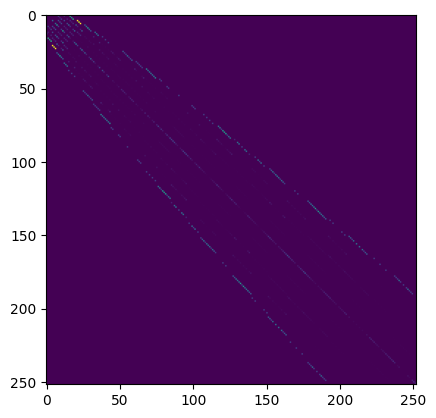

In [13]:
for attr in HB_rust.__dataclass_fields__.keys():
    fig, ax = plt.subplots()

    ax.imshow(np.abs((getattr(HB_rust, attr)) - (getattr(HB_python, attr))))
    print(
        f"{attr} = {(np.abs((getattr(HB_rust, attr))) - np.abs(getattr(HB_python, attr))).sum():.2e}"
    )


In [14]:
%%timeit
HB_python = hamiltonian.generate_coupled_hamiltonian_B(QN_B, cst_B)

48 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%%timeit
HB_rust = generate_coupled_hamiltonian_B_py(QN_B, cst_B)

47.8 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
QN = states.generate_uncoupled_states_ground(Js=[0, 1, 2, 3, 4, 5, 6])
QNc = states.generate_coupled_states_ground(Js=np.arange(QN[0].J, QN[-1].J + 1))

In [17]:
transform_python = hamiltonian.basis_transformations._generate_transform_matrix_python(
    QN, QNc
)

In [18]:
transform_rust = generate_transform_matrix_py(QN, QNc)

In [19]:
np.nanmax(np.abs(((transform_rust - transform_python) / transform_python)))

C:\Users\Olivier\AppData\Local\Temp\ipykernel_24564\2056003235.py:1: RuntimeWarning: invalid value encountered in divide
  np.nanmax(np.abs(((transform_rust - transform_python) / transform_python)))


np.float64(7.563644254429e-16)

In [20]:
%%timeit
transform_python = hamiltonian.basis_transformations._generate_transform_matrix_python(
    QN, QNc
)

1.31 s ± 64.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%timeit
transform_rust = generate_transform_matrix_py(QN, QNc)

122 ms ± 3.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
hamiltonian.basis_transformations.HAS_RUST

True

In [23]:
QNc = states.generate_coupled_states_ground(Js=[0, 1, 2, 3])
hamiltonian_reduced = hamiltonian.generate_reduced_X_hamiltonian(
    QNc,
)

In [24]:
cpl_python = couplings.generate_coupling_matrix(
    hamiltonian_reduced.QN_basis,
    hamiltonian_reduced.QN_basis,
    hamiltonian_reduced.QN_basis,
    pol_vec=np.array([0.0, 0.0, 1.0]),
    reduced=True,
)

In [25]:
cpl_rust = generate_coupling_matrix_py(
    hamiltonian_reduced.QN_basis,
    hamiltonian_reduced.QN_basis,
    hamiltonian_reduced.QN_basis,
    pol_vec=np.array([0.0, 0.0, 1.0]),
    reduced=True,
)

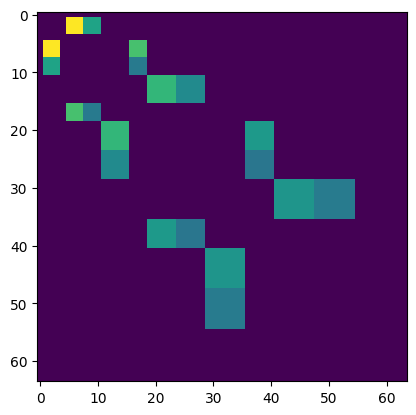

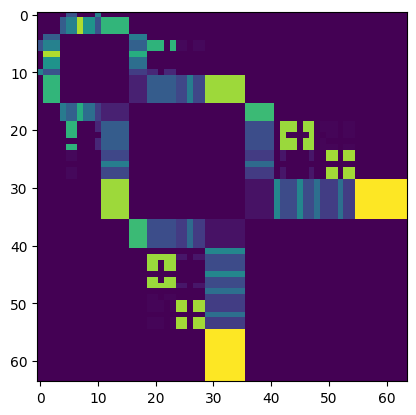

In [31]:
fig, ax = plt.subplots()
ax.imshow(np.abs(cpl_python))


fig, ax = plt.subplots()
ax.imshow(np.abs(cpl_python - cpl_rust))
